![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!
#read in data
cars = pd.read_csv("car_insurance.csv")

In [2]:
#data inspection
cars.info(), # missing values in #credit_score & #annual_mileage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

(None,)

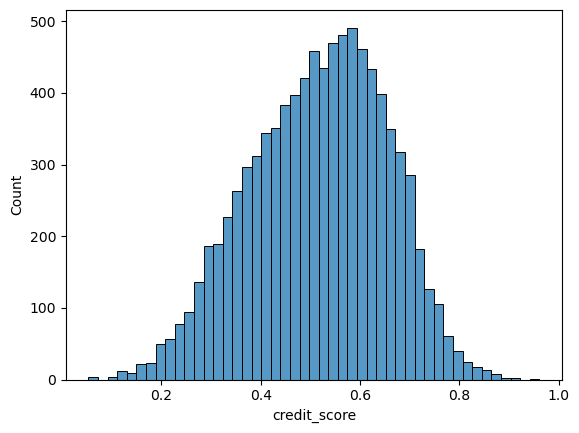

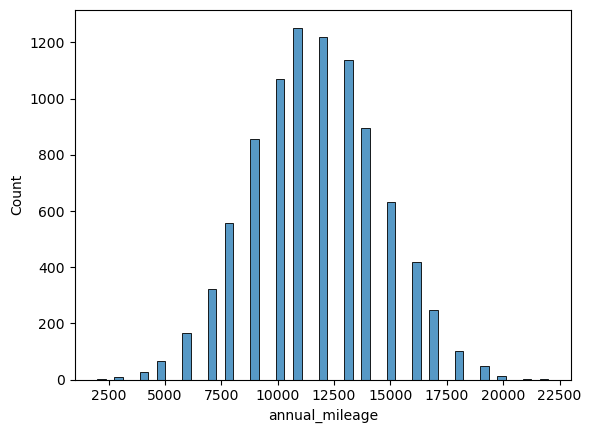

In [3]:
#deal with missing values
import matplotlib.pyplot as plt
import seaborn as sns
#want to visalize the data first
sns.histplot(x = "credit_score", data = cars)
plt.show()
sns.histplot(x = "annual_mileage", data = cars)
plt.show()

In [4]:
#Based on the graphs that we showed, we can impute the missing values with mean.
#make a copy of the original data
cars_cp = cars.copy()
cars_cp.fillna({'credit_score': cars_cp['credit_score'].mean()}, inplace = True)
cars_cp.fillna({'annual_mileage': cars_cp['annual_mileage'].mean()}, inplace = True)

In [5]:
#inspect data
cars_cp.info()  #no missing values
cars_cp.head() #for all the pbjects data, we should covert them into categorical codes that is given in the instruction.
# the columns are: driving_expereince, education, income, vehicle_year, vehicle_type
cars_cp.driving_experience.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [6]:
# the columns are: driving_expereince, education, income, vehicle_year, vehicle_type
# writing a for loop to do it
for i in cars_cp.columns:
    if cars_cp[i].dtype == 'object':
        if i == 'driving_experience':
            cars_cp[i] = pd.Categorical(cars_cp[i], categories= ['0-9y', '10-19y', '20-29y', '30y+'], ordered = True)
        elif i == 'education':
            cars_cp[i] = pd.Categorical(cars_cp[i], categories=['none', 'high school', 'university'], ordered = True)
        elif i == 'income' :
            cars_cp[i] = pd.Categorical(cars_cp[i], categories=['poverty', 'working class', 'middle class', 'upper class'], ordered = True)
        elif i == 'vehicle_year':
            cars_cp[i] = pd.Categorical(cars_cp[i], categories=['before 2015', 'after 2015'], ordered = True)
        elif i == 'vehicle_type':
            cars_cp[i] = pd.Categorical(cars_cp[i], categories=['sedan', 'sports car'], ordered = True)
        cars_cp[i] = cars_cp[i].cat.codes
        cars_cp[i] = cars_cp[i].astype('int64')


In [7]:
## double check to make sure our input are numerical before we feed the model.
cars_cp.info() #after the check, now we can fit the model 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  int64  
 4   education            10000 non-null  int64  
 5   income               10000 non-null  int64  
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  int64  
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  int64  
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [8]:
features = cars_cp.drop(['id', 'outcome'], axis = 1).columns

#now we can fit out data to logit model with the features
best_accuracy = 0
for i in features:
    cars_log = logit("outcome" + '~' + str(i), data = cars_cp).fit()
    conf_matrix = cars_log.pred_table()
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    acc = (TN + TP) / (TN + TP + FN + FP)
    if acc > best_accuracy:
        best_accuracy = acc
        best_feature = i

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.603848
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [9]:
data = {'best_feature': [best_feature],
        'best_accuracy' : [best_accuracy]}

best_feature_df = pd.DataFrame(data)
display(best_feature_df)

,best_feature,best_accuracy
0,driving_experience,0.7771
